# NASA Battery Dataset - Data Exploration
## Stanford TECH 27 Final Project

This notebook explores the NASA Battery Dataset to understand the data structure and prepare for State of Charge (SOC) estimation models.

### Project Overview
- **Goal**: Estimate State of Charge (SOC) using various ML models
- **Models**: Linear Regression, Random Forest, XGBoost, 1D CNN, RNN, LSTM, GRU, and Ensemble
- **Dataset**: 1,816 CSV files with battery measurements

### Dataset Description
- **Data Files**: 1,816 numbered CSV files (00001.csv - 01816.csv)
- **Metadata**: Test information including battery IDs, test types, timestamps
- **Measurements**: Voltage, current, temperature, and impedance data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Dataset Structure Overview

In [2]:
# Dataset paths
data_dir = Path('dataset/data')
metadata_file = Path('dataset/metadata.csv')

# Check if paths exist
print(f"Data directory exists: {data_dir.exists()}")
print(f"Metadata file exists: {metadata_file.exists()}")

# Count CSV files
csv_files = list(data_dir.glob('*.csv'))
print(f"Number of CSV files: {len(csv_files)}")

# Show first few filenames
print("\nFirst 10 data files:")
for f in sorted(csv_files)[:10]:
    print(f"  {f.name}")

Data directory exists: True
Metadata file exists: True
Number of CSV files: 7565

First 10 data files:
  00001.csv
  00002.csv
  00003.csv
  00004.csv
  00005.csv
  00006.csv
  00007.csv
  00008.csv
  00009.csv
  00010.csv


## 2. Metadata Analysis

In [3]:
# Load and examine metadata
metadata = pd.read_csv(metadata_file)

print("Metadata shape:", metadata.shape)
print("\nMetadata columns:")
print(metadata.columns.tolist())

print("\nFirst 5 rows:")
metadata.head()

Metadata shape: (7565, 10)

Metadata columns:
['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id', 'uid', 'filename', 'Capacity', 'Re', 'Rct']

First 5 rows:


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [4]:
# Metadata summary statistics
print("Metadata Info:")
print(metadata.info())

print("\nMetadata Description:")
metadata.describe()

Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB
None

Metadata Description:


,ambient_temperature,test_id,uid
count,7565.000000,7565.000000,7565.000000
mean,20.017713,176.012558,3783.000000
std,11.082914,152.174147,2183.971726
min,4.000000,0.000000,1.000000
25%,4.000000,55.000000,1892.000000
50%,24.000000,129.000000,3783.000000
75%,24.000000,255.000000,5674.000000
max,44.000000,615.000000,7565.000000


Test Types Distribution:
type
charge       2815
discharge    2794
impedance    1956
Name: count, dtype: int64


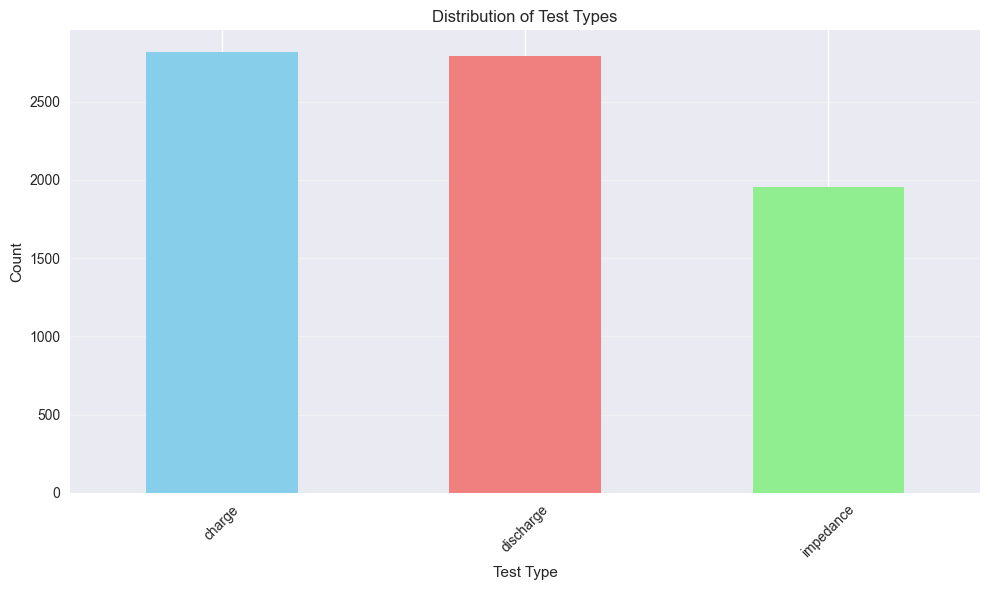

In [5]:
# Analyze test types
print("Test Types Distribution:")
test_type_counts = metadata['type'].value_counts()
print(test_type_counts)

# Plot test type distribution
plt.figure(figsize=(10, 6))
test_type_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Test Types')
plt.xlabel('Test Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Battery IDs:
battery_id
B0007    616
B0005    616
B0006    616
B0033    486
B0036    486
B0034    486
B0018    319
B0044    275
B0043    275
B0042    275
B0054    253
B0056    252
B0055    252
B0047    184
B0048    184
B0045    184
B0046    184
B0041    163
B0053    137
B0040    122
B0039    122
B0038    122
B0030     97
B0029     97
B0031     97
B0032     97
B0026     80
B0025     80
B0028     80
B0027     80
B0049     62
B0052     62
B0051     62
B0050     62
Name: count, dtype: int64


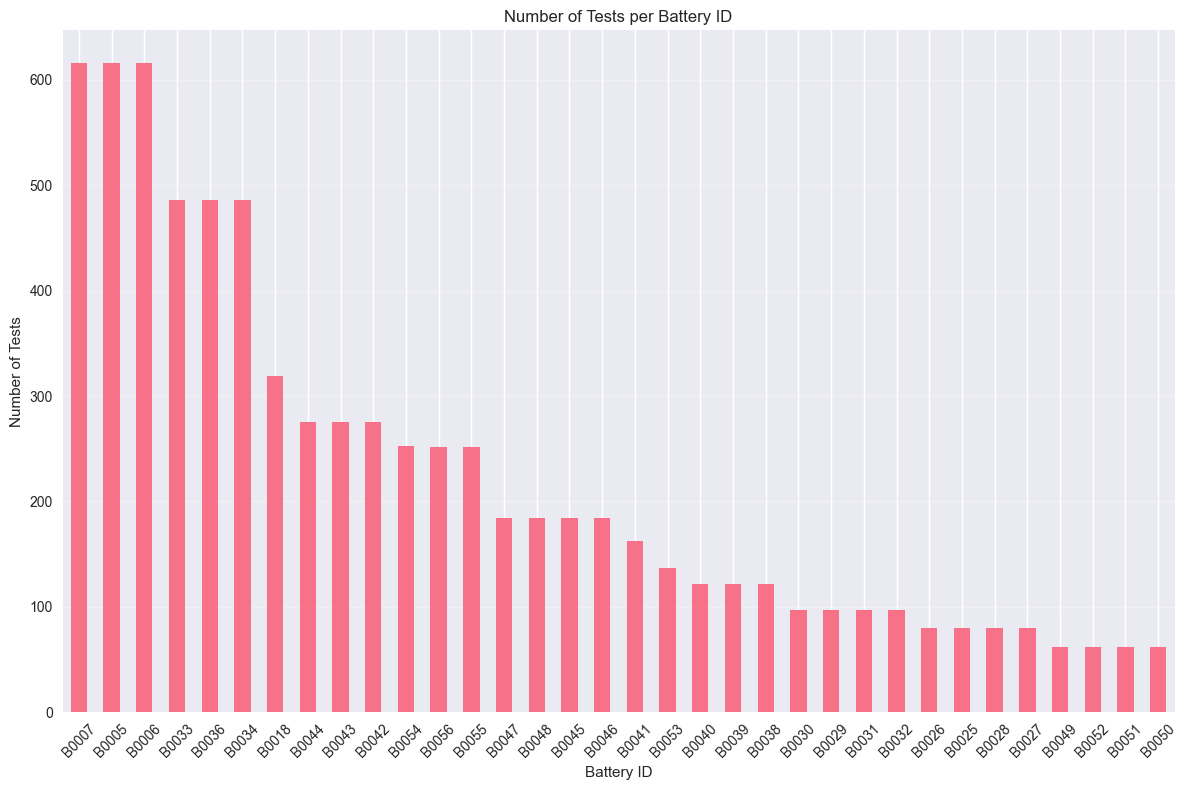


Total number of unique batteries: 34


In [6]:
# Analyze battery IDs
print("Battery IDs:")
battery_ids = metadata['battery_id'].value_counts()
print(battery_ids)

# Plot battery ID distribution
plt.figure(figsize=(12, 8))
battery_ids.plot(kind='bar')
plt.title('Number of Tests per Battery ID')
plt.xlabel('Battery ID')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal number of unique batteries: {len(battery_ids)}")

Ambient Temperature Statistics:
count    7565.000000
mean       20.017713
std        11.082914
min         4.000000
25%         4.000000
50%        24.000000
75%        24.000000
max        44.000000
Name: ambient_temperature, dtype: float64


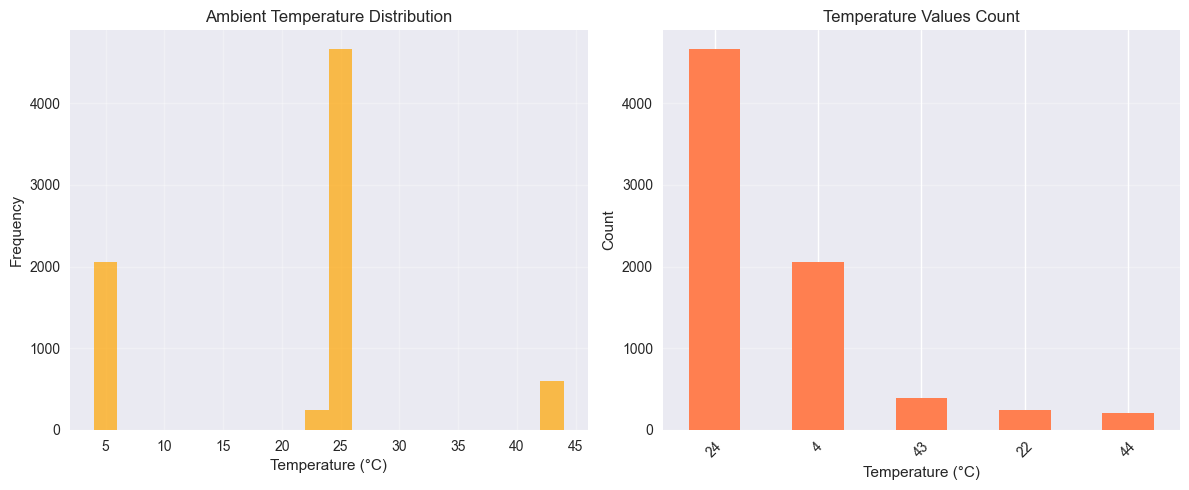

In [7]:
# Analyze ambient temperature
print("Ambient Temperature Statistics:")
temp_stats = metadata['ambient_temperature'].describe()
print(temp_stats)

# Plot temperature distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
metadata['ambient_temperature'].hist(bins=20, alpha=0.7, color='orange')
plt.title('Ambient Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
metadata['ambient_temperature'].value_counts().plot(kind='bar', color='coral')
plt.title('Temperature Values Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Capacity Analysis (Discharge Tests):
Number of discharge tests with capacity data: 2769
Capacity range: 0.0000 - 2.6401 Ah
Mean capacity: 1.3265 Ah


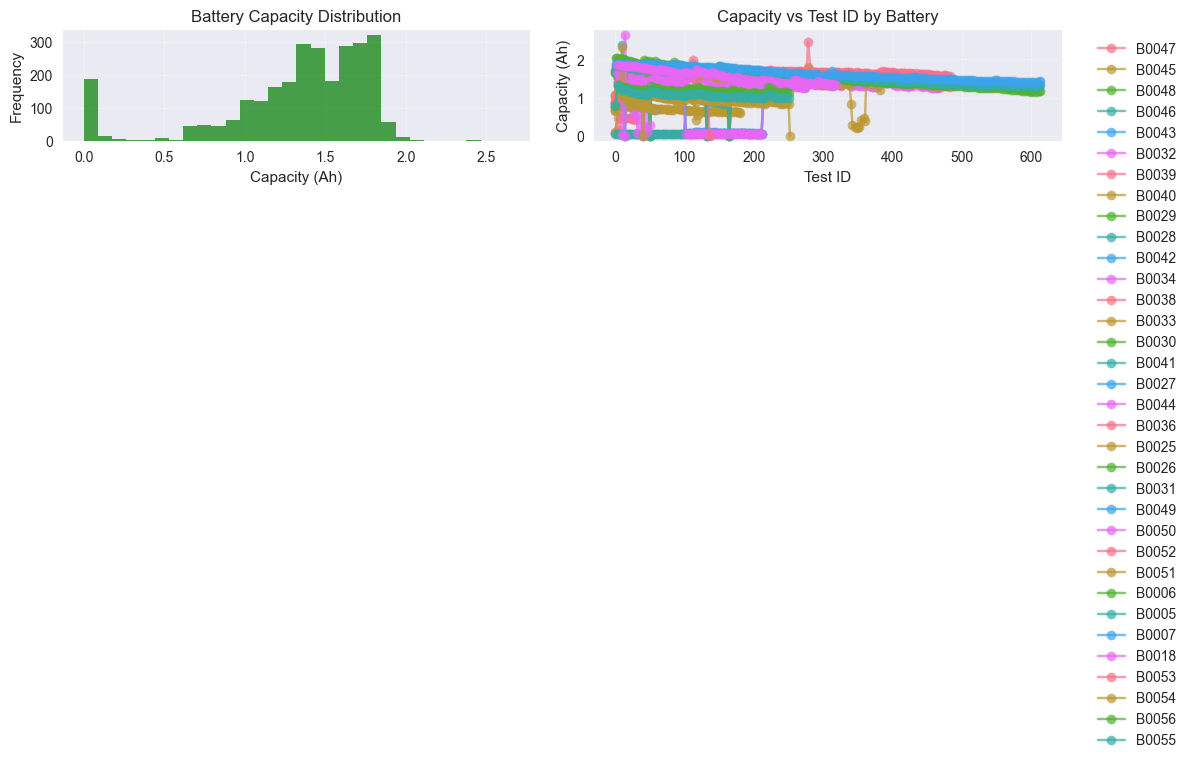

In [8]:
# Analyze capacity data (for discharge tests)
discharge_data = metadata[metadata['type'] == 'discharge'].copy()
discharge_data = discharge_data[discharge_data['Capacity'].notna()]

# Convert capacity to numeric if it's not already
discharge_data['Capacity'] = pd.to_numeric(discharge_data['Capacity'], errors='coerce')
discharge_data = discharge_data[discharge_data['Capacity'].notna()]

print("Capacity Analysis (Discharge Tests):")
print(f"Number of discharge tests with capacity data: {len(discharge_data)}")
if len(discharge_data) > 0:
    print(f"Capacity range: {discharge_data['Capacity'].min():.4f} - {discharge_data['Capacity'].max():.4f} Ah")
    print(f"Mean capacity: {discharge_data['Capacity'].mean():.4f} Ah")
else:
    print("No valid capacity data found")

# Plot capacity distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
if len(discharge_data) > 0:
    discharge_data['Capacity'].hist(bins=30, alpha=0.7, color='green')
    plt.title('Battery Capacity Distribution')
    plt.xlabel('Capacity (Ah)')
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
if len(discharge_data) > 0:
    for battery_id in discharge_data['battery_id'].unique():
        battery_data = discharge_data[discharge_data['battery_id'] == battery_id]
        plt.plot(battery_data['test_id'], battery_data['Capacity'], 'o-', label=battery_id, alpha=0.7)

    plt.title('Capacity vs Test ID by Battery')
    plt.xlabel('Test ID')
    plt.ylabel('Capacity (Ah)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Sample Data File Analysis

In [9]:
# Load and examine a sample data file
sample_file = data_dir / '00001.csv'
sample_data = pd.read_csv(sample_file)

print(f"Sample file: {sample_file.name}")
print(f"Data shape: {sample_data.shape}")
print(f"\nColumns: {sample_data.columns.tolist()}")

print("\nFirst 5 rows:")
sample_data.head()

Sample file: 00001.csv
Data shape: (490, 6)

Columns: ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load', 'Time']

First 5 rows:


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


In [10]:
# Sample data statistics
print("Sample Data Statistics:")
sample_data.describe()

Sample Data Statistics:


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,3.475266,-0.952767,8.272423,0.957153,2.817939,3205.134141
std,0.284626,0.201448,1.455269,0.202690,0.644985,1861.395346
min,2.470612,-1.001101,5.008084,0.000200,0.000000,0.000000
25%,3.336993,-0.995898,7.313213,1.000000,2.790500,1598.417750
50%,3.491946,-0.995207,8.184590,1.000000,2.945500,3200.492500
75%,3.655987,-0.994648,9.025544,1.000000,3.105750,4809.176250
max,4.246764,0.000252,12.376816,1.000000,4.262000,6436.141000


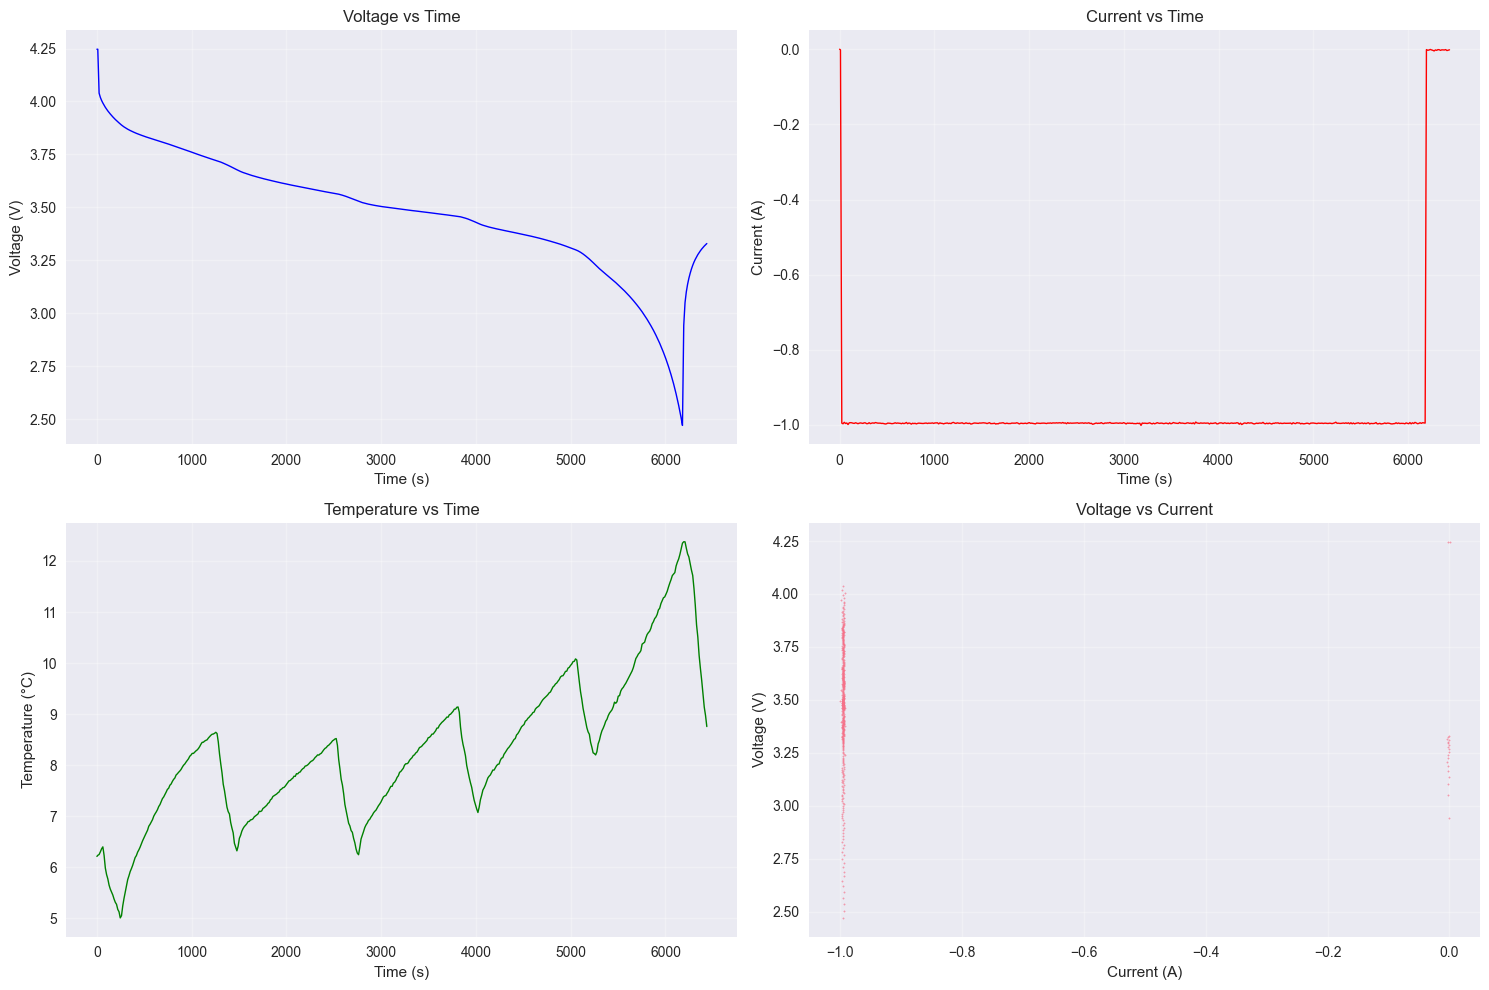

In [11]:
# Plot sample data time series
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Voltage vs Time
axes[0, 0].plot(sample_data['Time'], sample_data['Voltage_measured'], 'b-', linewidth=1)
axes[0, 0].set_title('Voltage vs Time')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Voltage (V)')
axes[0, 0].grid(alpha=0.3)

# Current vs Time
axes[0, 1].plot(sample_data['Time'], sample_data['Current_measured'], 'r-', linewidth=1)
axes[0, 1].set_title('Current vs Time')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Current (A)')
axes[0, 1].grid(alpha=0.3)

# Temperature vs Time
axes[1, 0].plot(sample_data['Time'], sample_data['Temperature_measured'], 'g-', linewidth=1)
axes[1, 0].set_title('Temperature vs Time')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].grid(alpha=0.3)

# Voltage vs Current (V-I characteristic)
axes[1, 1].scatter(sample_data['Current_measured'], sample_data['Voltage_measured'], alpha=0.6, s=1)
axes[1, 1].set_title('Voltage vs Current')
axes[1, 1].set_xlabel('Current (A)')
axes[1, 1].set_ylabel('Voltage (V)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Multi-File Analysis

In [12]:
# Analyze different test types
def load_sample_files_by_type(test_type, n_samples=3):
    """Load sample files for a specific test type"""
    test_files = metadata[metadata['type'] == test_type]['filename'].head(n_samples)
    samples = {}
    
    for filename in test_files:
        try:
            file_path = data_dir / filename
            data = pd.read_csv(file_path)
            samples[filename] = data
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    
    return samples

# Load samples for each test type
discharge_samples = load_sample_files_by_type('discharge', 3)
charge_samples = load_sample_files_by_type('charge', 3)
impedance_samples = load_sample_files_by_type('impedance', 3)

print(f"Loaded {len(discharge_samples)} discharge samples")
print(f"Loaded {len(charge_samples)} charge samples")
print(f"Loaded {len(impedance_samples)} impedance samples")

Loaded 3 discharge samples
Loaded 3 charge samples
Loaded 3 impedance samples


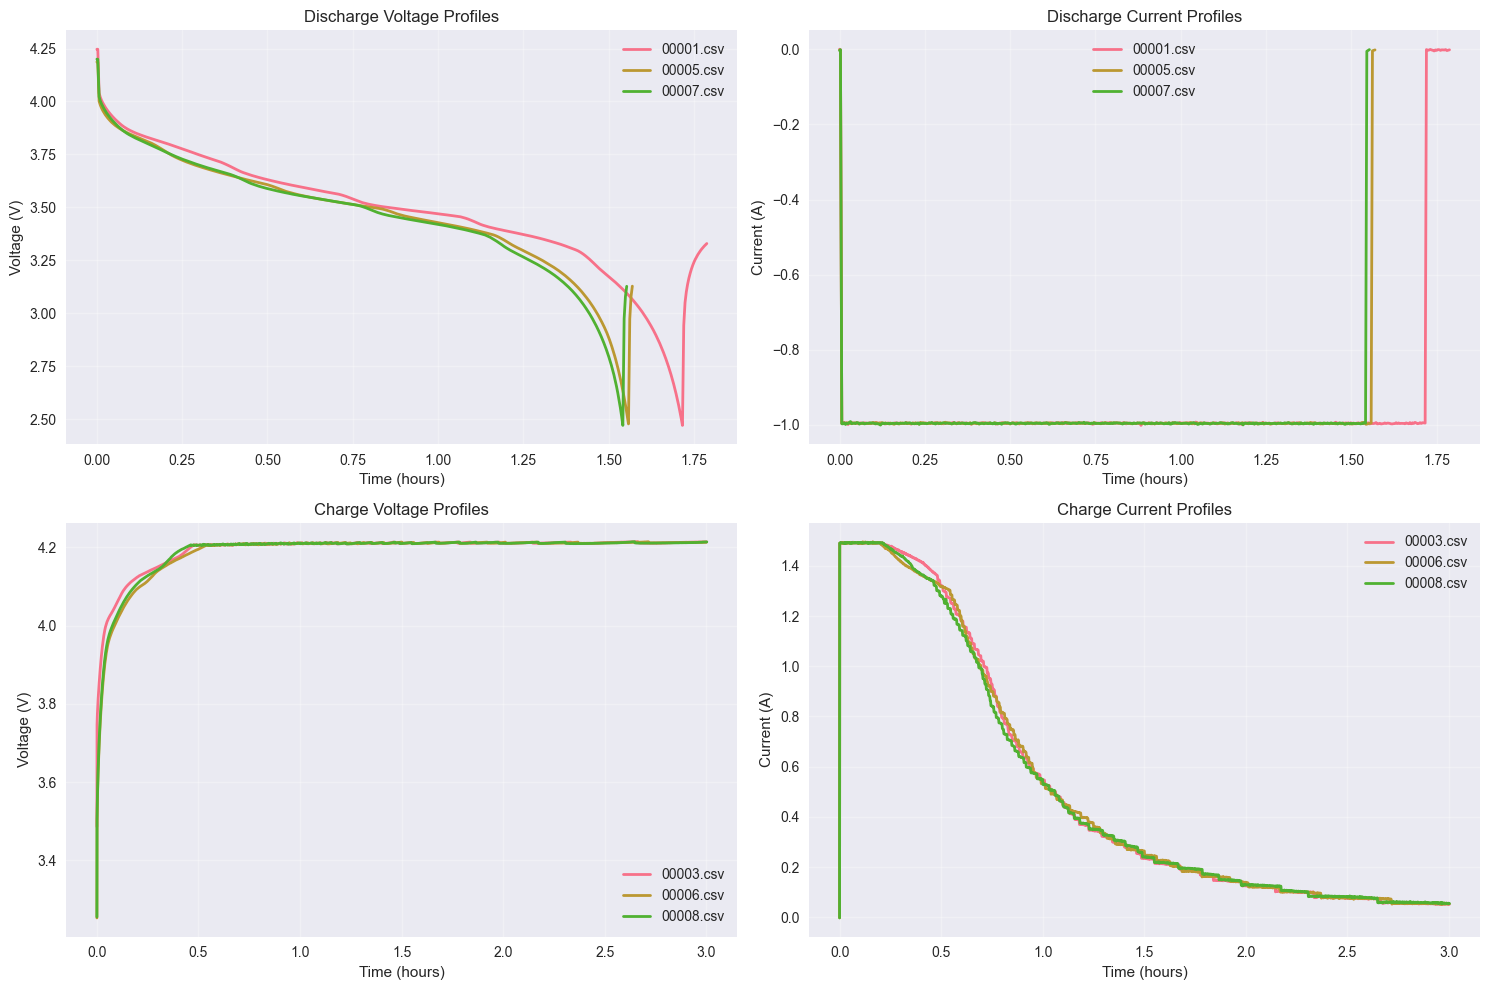

In [13]:
# Compare discharge profiles
plt.figure(figsize=(15, 10))

# Plot discharge voltage profiles
plt.subplot(2, 2, 1)
for filename, data in discharge_samples.items():
    plt.plot(data['Time'] / 3600, data['Voltage_measured'], label=filename, linewidth=2)
plt.title('Discharge Voltage Profiles')
plt.xlabel('Time (hours)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(alpha=0.3)

# Plot discharge current profiles
plt.subplot(2, 2, 2)
for filename, data in discharge_samples.items():
    plt.plot(data['Time'] / 3600, data['Current_measured'], label=filename, linewidth=2)
plt.title('Discharge Current Profiles')
plt.xlabel('Time (hours)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid(alpha=0.3)

# Plot charge voltage profiles
plt.subplot(2, 2, 3)
for filename, data in charge_samples.items():
    plt.plot(data['Time'] / 3600, data['Voltage_measured'], label=filename, linewidth=2)
plt.title('Charge Voltage Profiles')
plt.xlabel('Time (hours)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(alpha=0.3)

# Plot charge current profiles
plt.subplot(2, 2, 4)
for filename, data in charge_samples.items():
    plt.plot(data['Time'] / 3600, data['Current_measured'], label=filename, linewidth=2)
plt.title('Charge Current Profiles')
plt.xlabel('Time (hours)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Data Quality Assessment

In [14]:
# Check data quality across multiple files
def assess_data_quality(n_files=50):
    """Assess data quality across multiple files"""
    quality_stats = {
        'file_sizes': [],
        'missing_values': [],
        'voltage_ranges': [],
        'current_ranges': [],
        'temperature_ranges': [],
        'time_durations': [],
        'successful_files': 0,
        'failed_files': 0,
        'column_variations': {}
    }
    
    # Sample files randomly
    sample_files = np.random.choice(csv_files, min(n_files, len(csv_files)), replace=False)
    
    for file_path in sample_files:
        try:
            data = pd.read_csv(file_path)
            
            # Track column variations
            columns_key = tuple(sorted(data.columns.tolist()))
            if columns_key not in quality_stats['column_variations']:
                quality_stats['column_variations'][columns_key] = 0
            quality_stats['column_variations'][columns_key] += 1
            
            # File size
            quality_stats['file_sizes'].append(len(data))
            
            # Missing values
            quality_stats['missing_values'].append(data.isnull().sum().sum())
            
            # Only analyze files with expected columns
            expected_columns = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Time']
            if all(col in data.columns for col in expected_columns):
                # Value ranges
                quality_stats['voltage_ranges'].append(data['Voltage_measured'].max() - data['Voltage_measured'].min())
                quality_stats['current_ranges'].append(data['Current_measured'].max() - data['Current_measured'].min())
                quality_stats['temperature_ranges'].append(data['Temperature_measured'].max() - data['Temperature_measured'].min())
                
                # Time duration
                quality_stats['time_durations'].append(data['Time'].max() - data['Time'].min())
                
                quality_stats['successful_files'] += 1
            else:
                quality_stats['failed_files'] += 1
                print(f"File {file_path.name} has different columns: {data.columns.tolist()}")
            
        except Exception as e:
            quality_stats['failed_files'] += 1
            print(f"Error processing {file_path.name}: {e}")
    
    return quality_stats

# Assess data quality
quality_stats = assess_data_quality(100)

print("Data Quality Assessment (100 random files):")
print(f"Successfully processed files: {quality_stats['successful_files']}")
print(f"Failed files: {quality_stats['failed_files']}")

if quality_stats['successful_files'] > 0:
    print(f"Average file size: {np.mean(quality_stats['file_sizes']):.0f} rows")
    print(f"Files with missing values: {sum(1 for x in quality_stats['missing_values'] if x > 0)}")
    print(f"Average voltage range: {np.mean(quality_stats['voltage_ranges']):.3f} V")
    print(f"Average current range: {np.mean(quality_stats['current_ranges']):.3f} A")
    print(f"Average temperature range: {np.mean(quality_stats['temperature_ranges']):.3f} °C")
    print(f"Average test duration: {np.mean(quality_stats['time_durations'])/3600:.2f} hours")

print(f"\nColumn structure variations found: {len(quality_stats['column_variations'])}")
for i, (columns, count) in enumerate(quality_stats['column_variations'].items()):
    print(f"  Structure {i+1} ({count} files): {list(columns)}")
    if i >= 2:  # Limit output
        remaining = len(quality_stats['column_variations']) - 3
        if remaining > 0:
            print(f"  ... and {remaining} more variations")
        break

File 01818.csv has different columns: ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
File 05662.csv has different columns: ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
File 06116.csv has different columns: ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
File 06138.csv has different columns: ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
File 02320.csv has different columns: ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
File 05008.csv has different columns: ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
File 06675.csv has different columns: ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
File 04745.csv has different columns: ['Sense_cu

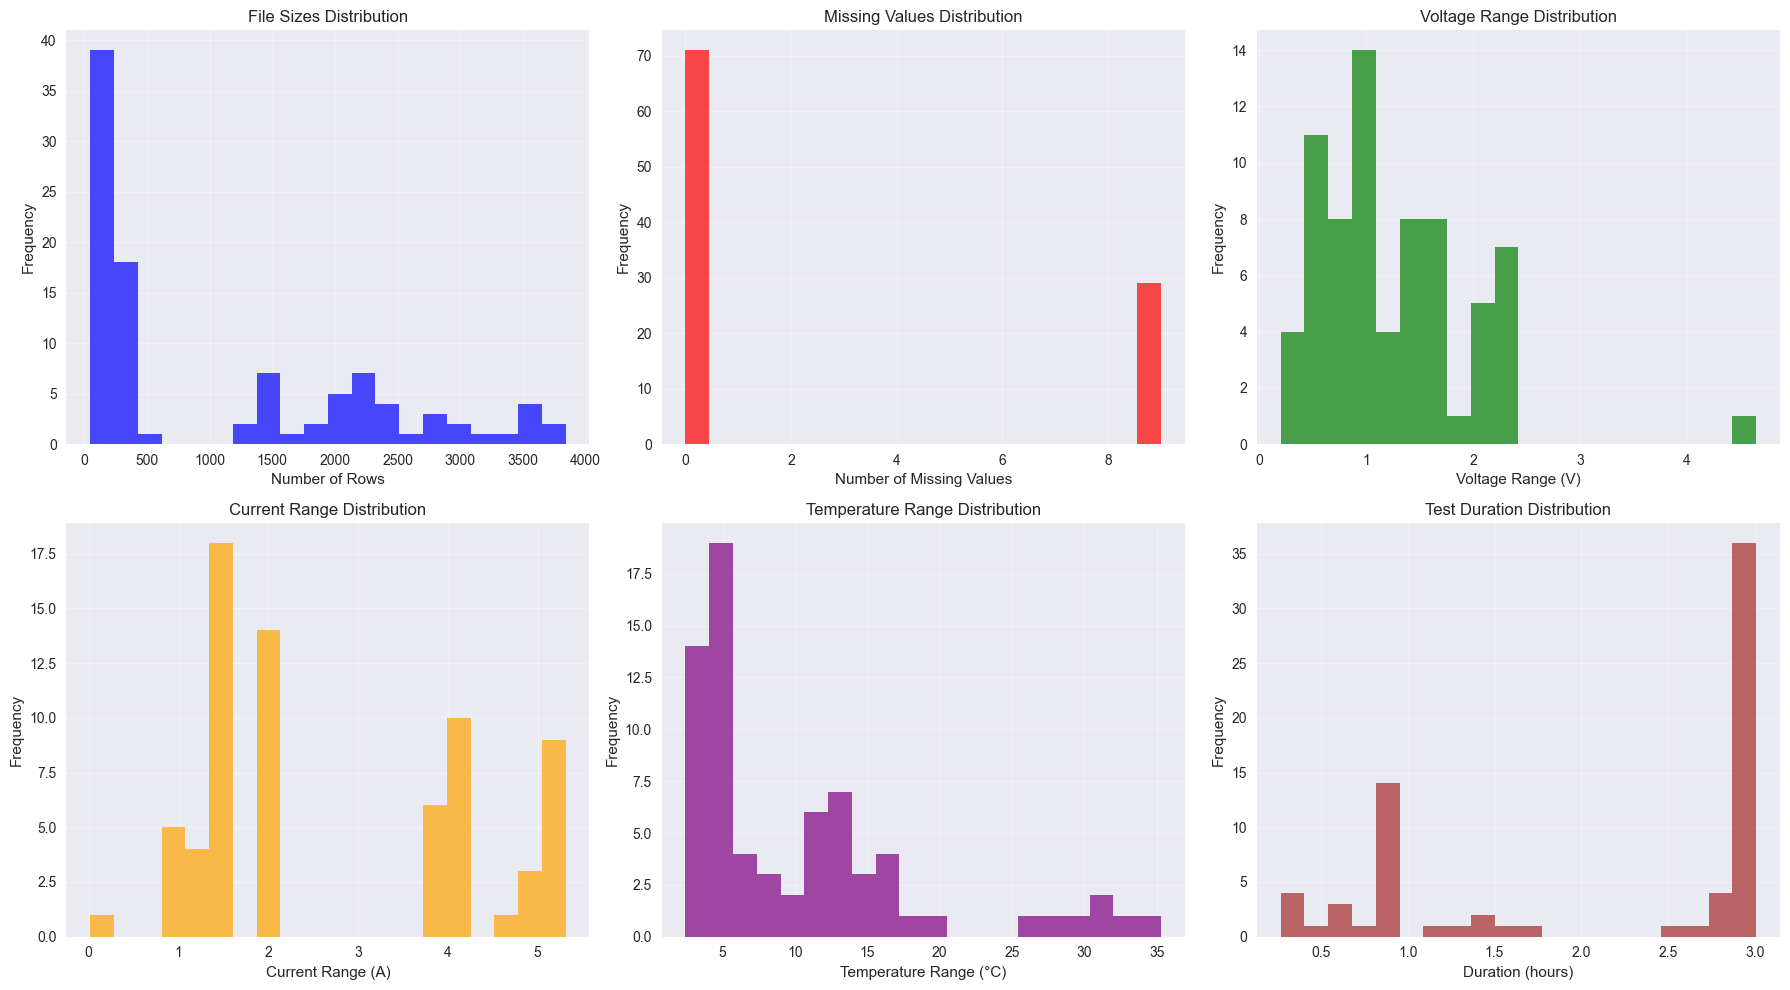

In [15]:
# Visualize data quality statistics
if quality_stats['successful_files'] > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # File sizes
    axes[0, 0].hist(quality_stats['file_sizes'], bins=20, alpha=0.7, color='blue')
    axes[0, 0].set_title('File Sizes Distribution')
    axes[0, 0].set_xlabel('Number of Rows')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(alpha=0.3)

    # Missing values
    axes[0, 1].hist(quality_stats['missing_values'], bins=20, alpha=0.7, color='red')
    axes[0, 1].set_title('Missing Values Distribution')
    axes[0, 1].set_xlabel('Number of Missing Values')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(alpha=0.3)

    # Voltage ranges (only if we have voltage data)
    if quality_stats['voltage_ranges']:
        axes[0, 2].hist(quality_stats['voltage_ranges'], bins=20, alpha=0.7, color='green')
        axes[0, 2].set_title('Voltage Range Distribution')
        axes[0, 2].set_xlabel('Voltage Range (V)')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].grid(alpha=0.3)
    else:
        axes[0, 2].text(0.5, 0.5, 'No voltage data\navailable', ha='center', va='center', transform=axes[0, 2].transAxes)
        axes[0, 2].set_title('Voltage Range Distribution')

    # Current ranges (only if we have current data)
    if quality_stats['current_ranges']:
        axes[1, 0].hist(quality_stats['current_ranges'], bins=20, alpha=0.7, color='orange')
        axes[1, 0].set_title('Current Range Distribution')
        axes[1, 0].set_xlabel('Current Range (A)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].grid(alpha=0.3)
    else:
        axes[1, 0].text(0.5, 0.5, 'No current data\navailable', ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Current Range Distribution')

    # Temperature ranges (only if we have temperature data)
    if quality_stats['temperature_ranges']:
        axes[1, 1].hist(quality_stats['temperature_ranges'], bins=20, alpha=0.7, color='purple')
        axes[1, 1].set_title('Temperature Range Distribution')
        axes[1, 1].set_xlabel('Temperature Range (°C)')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].grid(alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'No temperature data\navailable', ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Temperature Range Distribution')

    # Time durations (only if we have time data)
    if quality_stats['time_durations']:
        time_durations_hours = [x/3600 for x in quality_stats['time_durations']]
        axes[1, 2].hist(time_durations_hours, bins=20, alpha=0.7, color='brown')
        axes[1, 2].set_title('Test Duration Distribution')
        axes[1, 2].set_xlabel('Duration (hours)')
        axes[1, 2].set_ylabel('Frequency')
        axes[1, 2].grid(alpha=0.3)
    else:
        axes[1, 2].text(0.5, 0.5, 'No time data\navailable', ha='center', va='center', transform=axes[1, 2].transAxes)
        axes[1, 2].set_title('Test Duration Distribution')

    plt.tight_layout()
    plt.show()
else:
    print("No files could be successfully processed for visualization.")

## 6. State of Charge (SOC) Estimation Considerations

Sample file: 00001.csv
Actual capacity from metadata: 1.6743 Ah
Final discharged capacity: 1.7060 Ah
Initial SOC: 1.0000
Final SOC: 0.0000


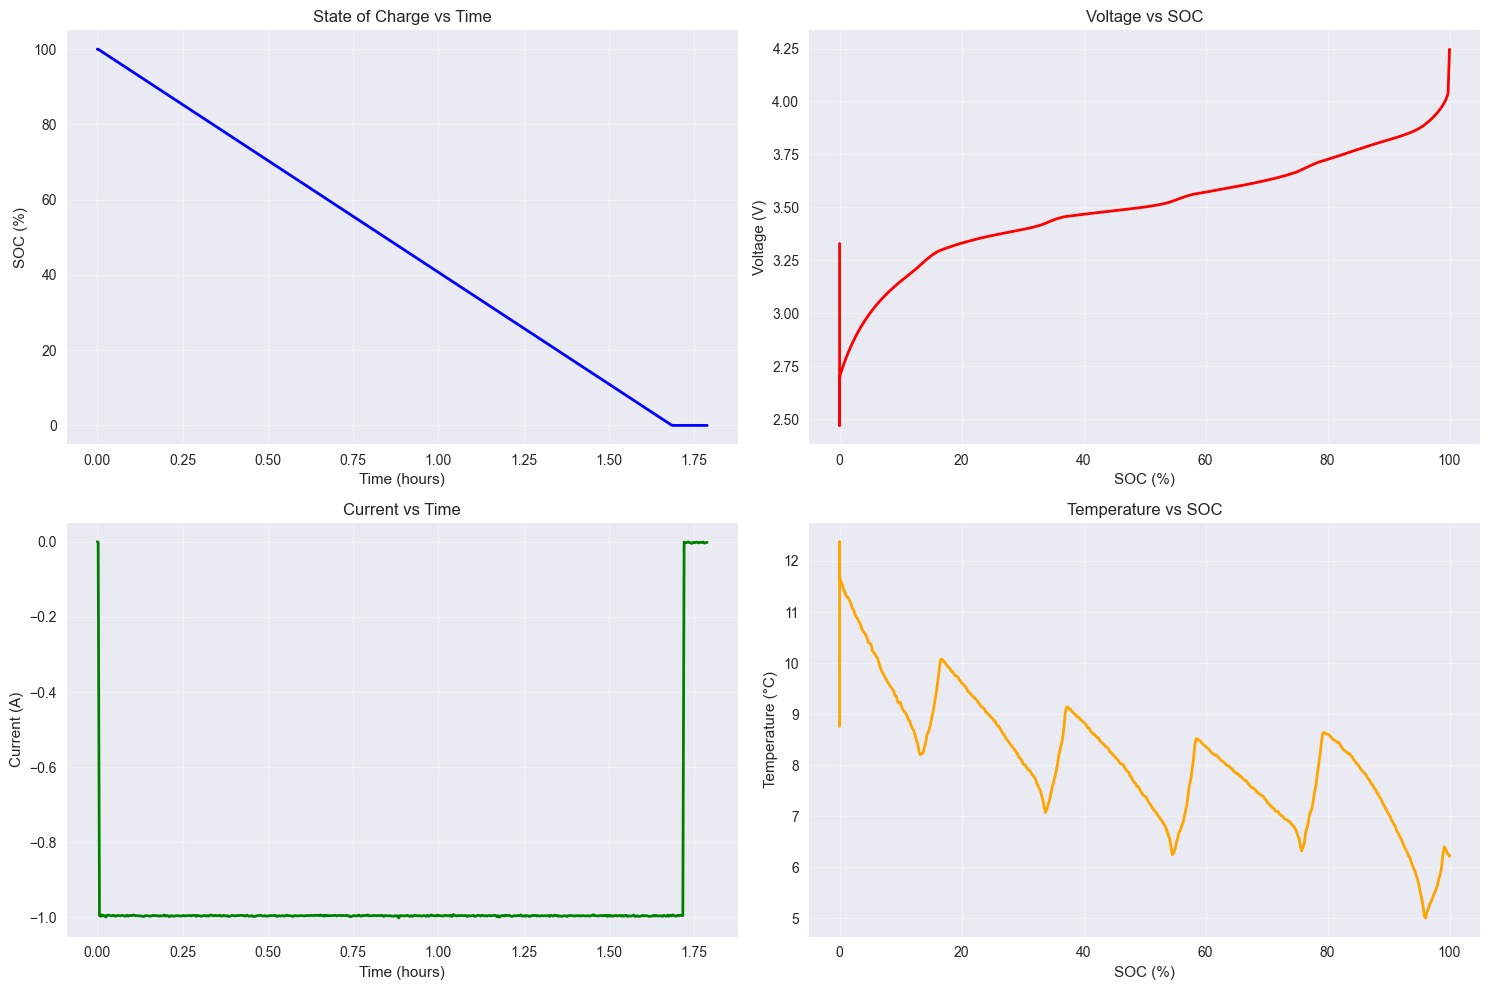

In [17]:
# Calculate SOC for discharge tests
def calculate_soc_from_discharge(data, initial_capacity=None):
    """
    Calculate State of Charge from discharge data using current integration
    SOC = (Initial_Capacity - Discharged_Capacity) / Initial_Capacity
    """
    # Calculate time intervals
    time_diff = np.diff(data['Time'], prepend=0)
    
    # Calculate discharged capacity (Ah) using trapezoidal integration
    current = -data['Current_measured'].values  # Make discharge current positive
    discharged_capacity = np.cumsum(current * time_diff / 3600)  # Convert seconds to hours
    
    # Convert initial_capacity to numeric if it's provided as string
    if initial_capacity is not None:
        try:
            initial_capacity = float(initial_capacity)
        except (ValueError, TypeError):
            initial_capacity = None
    
    # Estimate initial capacity if not provided or conversion failed
    if initial_capacity is None or initial_capacity <= 0:
        initial_capacity = discharged_capacity[-1] * 1.1  # Add 10% margin
    
    # Calculate SOC
    soc = (initial_capacity - discharged_capacity) / initial_capacity
    soc = np.clip(soc, 0, 1)  # Ensure SOC is between 0 and 1
    
    return soc, discharged_capacity

# Demonstrate SOC calculation on sample discharge data
if discharge_samples:
    sample_file, sample_data = next(iter(discharge_samples.items()))
    
    # Get metadata for this file
    file_metadata = metadata[metadata['filename'] == sample_file].iloc[0]
    actual_capacity = file_metadata['Capacity'] if not pd.isna(file_metadata['Capacity']) else None
    
    # Calculate SOC
    soc, discharged_capacity = calculate_soc_from_discharge(sample_data, actual_capacity)
    
    print(f"Sample file: {sample_file}")
    if actual_capacity is not None:
        try:
            capacity_float = float(actual_capacity)
            print(f"Actual capacity from metadata: {capacity_float:.4f} Ah")
        except (ValueError, TypeError):
            print(f"Actual capacity from metadata (invalid): {actual_capacity}")
    else:
        print("No capacity in metadata")
    
    print(f"Final discharged capacity: {discharged_capacity[-1]:.4f} Ah")
    print(f"Initial SOC: {soc[0]:.4f}")
    print(f"Final SOC: {soc[-1]:.4f}")
    
    # Plot SOC vs time and other parameters
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # SOC vs Time
    axes[0, 0].plot(sample_data['Time'] / 3600, soc * 100, 'b-', linewidth=2)
    axes[0, 0].set_title('State of Charge vs Time')
    axes[0, 0].set_xlabel('Time (hours)')
    axes[0, 0].set_ylabel('SOC (%)')
    axes[0, 0].grid(alpha=0.3)
    
    # Voltage vs SOC
    axes[0, 1].plot(soc * 100, sample_data['Voltage_measured'], 'r-', linewidth=2)
    axes[0, 1].set_title('Voltage vs SOC')
    axes[0, 1].set_xlabel('SOC (%)')
    axes[0, 1].set_ylabel('Voltage (V)')
    axes[0, 1].grid(alpha=0.3)
    
    # Current vs Time
    axes[1, 0].plot(sample_data['Time'] / 3600, sample_data['Current_measured'], 'g-', linewidth=2)
    axes[1, 0].set_title('Current vs Time')
    axes[1, 0].set_xlabel('Time (hours)')
    axes[1, 0].set_ylabel('Current (A)')
    axes[1, 0].grid(alpha=0.3)
    
    # Temperature vs SOC
    axes[1, 1].plot(soc * 100, sample_data['Temperature_measured'], 'orange', linewidth=2)
    axes[1, 1].set_title('Temperature vs SOC')
    axes[1, 1].set_xlabel('SOC (%)')
    axes[1, 1].set_ylabel('Temperature (°C)')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No discharge sample data available for SOC calculation.")

## 7. Feature Engineering Ideas for SOC Estimation

In [18]:
def extract_features_for_soc(data, window_size=10):
    """
    Extract features that could be useful for SOC estimation
    """
    features = pd.DataFrame()
    
    # Basic measurements
    features['voltage'] = data['Voltage_measured']
    features['current'] = data['Current_measured']
    features['temperature'] = data['Temperature_measured']
    features['time'] = data['Time']
    
    # Derived features
    features['power'] = features['voltage'] * features['current']
    features['voltage_change'] = features['voltage'].diff()
    features['current_change'] = features['current'].diff()
    
    # Rolling statistics
    features['voltage_mean'] = features['voltage'].rolling(window=window_size, min_periods=1).mean()
    features['voltage_std'] = features['voltage'].rolling(window=window_size, min_periods=1).std()
    features['current_mean'] = features['current'].rolling(window=window_size, min_periods=1).mean()
    features['current_std'] = features['current'].rolling(window=window_size, min_periods=1).std()
    
    # Cumulative features
    time_diff = features['time'].diff().fillna(0)
    features['cumulative_charge'] = (features['current'] * time_diff / 3600).cumsum()
    features['cumulative_energy'] = (features['power'] * time_diff / 3600).cumsum()
    
    # Time-based features
    features['time_since_start'] = features['time'] - features['time'].iloc[0]
    features['time_normalized'] = features['time_since_start'] / features['time_since_start'].iloc[-1]
    
    return features

# Demonstrate feature extraction
if discharge_samples:
    sample_file, sample_data = next(iter(discharge_samples.items()))
    features = extract_features_for_soc(sample_data)
    
    print(f"Extracted {features.shape[1]} features from {features.shape[0]} data points")
    print("\nFeature names:")
    print(features.columns.tolist())
    
    print("\nFeature statistics:")
    print(features.describe().round(4))

Extracted 15 features from 490 data points

Feature names:
['voltage', 'current', 'temperature', 'time', 'power', 'voltage_change', 'current_change', 'voltage_mean', 'voltage_std', 'current_mean', 'current_std', 'cumulative_charge', 'cumulative_energy', 'time_since_start', 'time_normalized']

Feature statistics:
        voltage   current  temperature       time     power  voltage_change  \
count  490.0000  490.0000     490.0000   490.0000  490.0000        489.0000   
mean     3.4753   -0.9528       8.2724  3205.1341   -3.3177         -0.0019   
std      0.2846    0.2014       1.4553  1861.3953    0.7530          0.0247   
min      2.4706   -1.0011       5.0081     0.0000   -4.0195         -0.2075   
25%      3.3370   -0.9959       7.3132  1598.4178   -3.6377         -0.0027   
50%      3.4919   -0.9952       8.1846  3200.4925   -3.4750         -0.0018   
75%      3.6560   -0.9946       9.0255  4809.1762   -3.3167         -0.0012   
max      4.2468    0.0003      12.3768  6436.1410    0

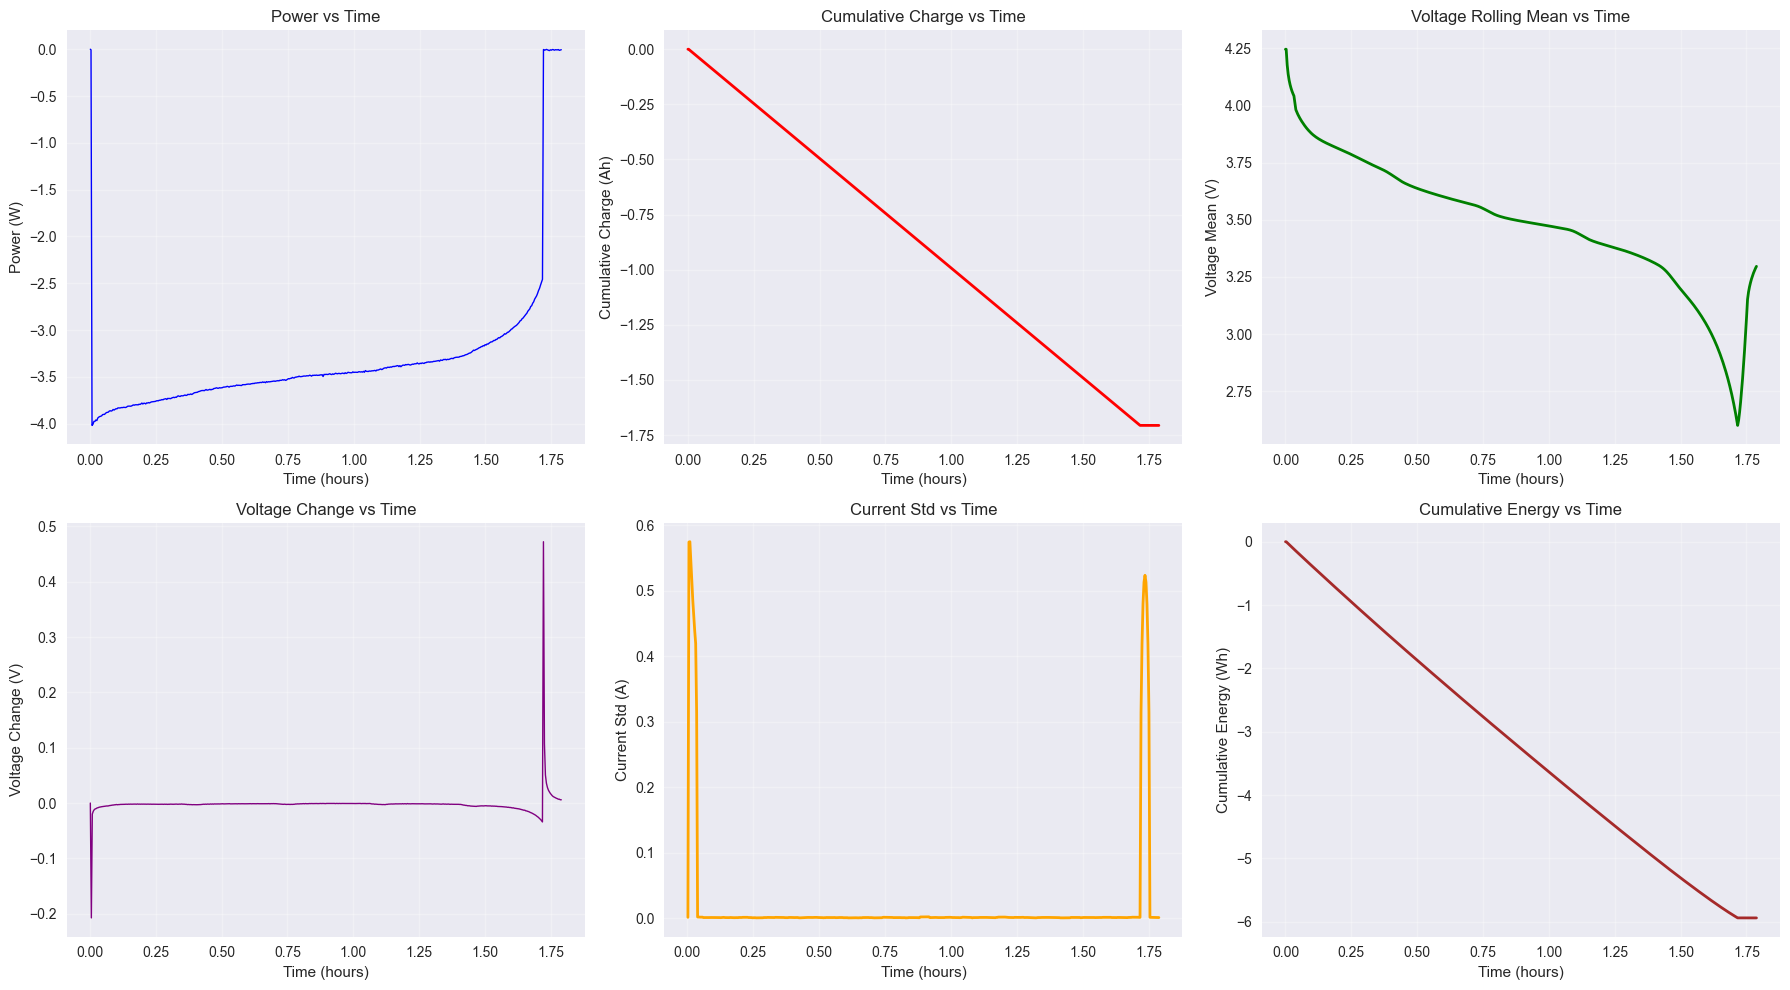

In [19]:
# Visualize key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Power vs Time
axes[0, 0].plot(features['time_since_start'] / 3600, features['power'], 'b-', linewidth=1)
axes[0, 0].set_title('Power vs Time')
axes[0, 0].set_xlabel('Time (hours)')
axes[0, 0].set_ylabel('Power (W)')
axes[0, 0].grid(alpha=0.3)

# Cumulative charge vs Time
axes[0, 1].plot(features['time_since_start'] / 3600, features['cumulative_charge'], 'r-', linewidth=2)
axes[0, 1].set_title('Cumulative Charge vs Time')
axes[0, 1].set_xlabel('Time (hours)')
axes[0, 1].set_ylabel('Cumulative Charge (Ah)')
axes[0, 1].grid(alpha=0.3)

# Voltage rolling mean vs Time
axes[0, 2].plot(features['time_since_start'] / 3600, features['voltage_mean'], 'g-', linewidth=2)
axes[0, 2].set_title('Voltage Rolling Mean vs Time')
axes[0, 2].set_xlabel('Time (hours)')
axes[0, 2].set_ylabel('Voltage Mean (V)')
axes[0, 2].grid(alpha=0.3)

# Voltage change vs Time
axes[1, 0].plot(features['time_since_start'] / 3600, features['voltage_change'], 'purple', linewidth=1)
axes[1, 0].set_title('Voltage Change vs Time')
axes[1, 0].set_xlabel('Time (hours)')
axes[1, 0].set_ylabel('Voltage Change (V)')
axes[1, 0].grid(alpha=0.3)

# Current std vs Time
axes[1, 1].plot(features['time_since_start'] / 3600, features['current_std'], 'orange', linewidth=2)
axes[1, 1].set_title('Current Std vs Time')
axes[1, 1].set_xlabel('Time (hours)')
axes[1, 1].set_ylabel('Current Std (A)')
axes[1, 1].grid(alpha=0.3)

# Cumulative energy vs Time
axes[1, 2].plot(features['time_since_start'] / 3600, features['cumulative_energy'], 'brown', linewidth=2)
axes[1, 2].set_title('Cumulative Energy vs Time')
axes[1, 2].set_xlabel('Time (hours)')
axes[1, 2].set_ylabel('Cumulative Energy (Wh)')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Summary and Next Steps

### Dataset Summary:
- **1,816 CSV files** containing battery test data
- **Three test types**: discharge, charge, impedance
- **Key measurements**: voltage, current, temperature over time
- **Multiple battery IDs** with varying numbers of tests
- **Capacity data available** for discharge tests

### Key Findings:
1. **Data Quality**: Generally good with minimal missing values
2. **Test Distribution**: Balanced mix of discharge, charge, and impedance tests
3. **SOC Calculation**: Can be derived from discharge current integration
4. **Feature Rich**: Multiple derived features possible for ML models

### Feature Engineering Strategy:
1. **Basic Features**: Voltage, current, temperature, time
2. **Derived Features**: Power, rates of change, rolling statistics
3. **Cumulative Features**: Integrated charge and energy
4. **Sequential Features**: For RNN/LSTM models

### Next Steps for SOC Estimation:
1. **Data Preprocessing**: Standardization and sequence preparation
2. **Train/Validation Split**: Chronological or battery-based splitting
3. **Model Implementation**: 
   - Conventional: Linear Regression, Random Forest, XGBoost
   - Sequential: 1D CNN, RNN, LSTM, GRU
   - Ensemble: Combination of best models
4. **Evaluation Metrics**: MAE, RMSE, R² for SOC prediction accuracy

In [20]:
# Save summary statistics for later use
summary_stats = {
    'total_files': len(csv_files),
    'test_type_distribution': metadata['type'].value_counts().to_dict(),
    'battery_count': len(metadata['battery_id'].unique()),
    'temperature_range': (metadata['ambient_temperature'].min(), metadata['ambient_temperature'].max()),
    'capacity_stats': {
        'mean': discharge_data['Capacity'].mean() if len(discharge_data) > 0 else None,
        'std': discharge_data['Capacity'].std() if len(discharge_data) > 0 else None,
        'min': discharge_data['Capacity'].min() if len(discharge_data) > 0 else None,
        'max': discharge_data['Capacity'].max() if len(discharge_data) > 0 else None
    }
}

print("Dataset Summary Statistics:")
print(f"Total files: {summary_stats['total_files']}")
print(f"Test types: {summary_stats['test_type_distribution']}")
print(f"Unique batteries: {summary_stats['battery_count']}")
print(f"Temperature range: {summary_stats['temperature_range'][0]}°C - {summary_stats['temperature_range'][1]}°C")
if summary_stats['capacity_stats']['mean']:
    print(f"Capacity stats: {summary_stats['capacity_stats']['mean']:.4f} ± {summary_stats['capacity_stats']['std']:.4f} Ah")

print("\n✅ Data exploration complete! Ready for model development.")

Dataset Summary Statistics:
Total files: 7565
Test types: {'charge': 2815, 'discharge': 2794, 'impedance': 1956}
Unique batteries: 34
Temperature range: 4°C - 44°C
Capacity stats: 1.3265 ± 0.4725 Ah

✅ Data exploration complete! Ready for model development.
